<h1>Generatoren programmieren (Fortsetzung)</h1>

Hier noch einmal der Generator der Primzahlzwillinge vom letzten Mal.

In [1]:
def primzw(n=oo):
    p=3
    while p<n:
        q=next_prime(p)
        if q==p+2:
            yield (p,q)
        p=q

In [2]:
list(primzw(1000))

[(3, 5),
 (5, 7),
 (11, 13),
 (17, 19),
 (29, 31),
 (41, 43),
 (59, 61),
 (71, 73),
 (101, 103),
 (107, 109),
 (137, 139),
 (149, 151),
 (179, 181),
 (191, 193),
 (197, 199),
 (227, 229),
 (239, 241),
 (269, 271),
 (281, 283),
 (311, 313),
 (347, 349),
 (419, 421),
 (431, 433),
 (461, 463),
 (521, 523),
 (569, 571),
 (599, 601),
 (617, 619),
 (641, 643),
 (659, 661),
 (809, 811),
 (821, 823),
 (827, 829),
 (857, 859),
 (881, 883)]

Man kann aus gegebenen Generatoren auch neue programmieren. Hier ist ein Generator, der die ersten n Elemente des gegebenen Generators g liefert.

In [3]:
def firstn(g,n):
    for i in range(n):
        yield next(g)

Die ersten 20 Primzahlzwillinge.

In [4]:
list(firstn(primzw(),20))

[(3, 5),
 (5, 7),
 (11, 13),
 (17, 19),
 (29, 31),
 (41, 43),
 (59, 61),
 (71, 73),
 (101, 103),
 (107, 109),
 (137, 139),
 (149, 151),
 (179, 181),
 (191, 193),
 (197, 199),
 (227, 229),
 (239, 241),
 (269, 271),
 (281, 283),
 (311, 313)]

<h2>Rekursive Generatoren</h2>

Generatoren können auch rekursiv definiert werden.

Im folgenden Beispiel schreiben wir einen Generator, der die Elemente der $n$-ten kartesischen Potenz einer Menge $S$ liefert. Diese kann induktiv definiert werden durch $S^n = S \times S^{n-1}$. Das lässt sich direkt in einen Generator übersetzen.

In [5]:
def cart(S,n):
    if n==0:
        yield []
    else:
        for s in S:
            for p in cart(S,n-1):
                yield [s]+p

In [6]:
list(cart([1,2],4))

[[1, 1, 1, 1],
 [1, 1, 1, 2],
 [1, 1, 2, 1],
 [1, 1, 2, 2],
 [1, 2, 1, 1],
 [1, 2, 1, 2],
 [1, 2, 2, 1],
 [1, 2, 2, 2],
 [2, 1, 1, 1],
 [2, 1, 1, 2],
 [2, 1, 2, 1],
 [2, 1, 2, 2],
 [2, 2, 1, 1],
 [2, 2, 1, 2],
 [2, 2, 2, 1],
 [2, 2, 2, 2]]

Hier schreiben wir einen Generator, der alle Permutationen einer Menge $S$ liefert (hier dargestellt als alle Anordnungen der Elemente von $S$). Jede Permutation besteht aus einem Element, das an den Anfang gestellt wird, und einer Permutation der restlichen Elemente. Daraus ergibt sich folgender rekursiver Generator.

In [7]:
def perm(S):
    if S==Set():  # leere Menge
        yield []
    else:
        for s in S:
            for p in perm(S-{s}):
                yield [s]+p

In [8]:
list(perm({1,2,3,4}))

[[1, 2, 3, 4],
 [1, 2, 4, 3],
 [1, 3, 2, 4],
 [1, 3, 4, 2],
 [1, 4, 2, 3],
 [1, 4, 3, 2],
 [2, 1, 3, 4],
 [2, 1, 4, 3],
 [2, 3, 1, 4],
 [2, 3, 4, 1],
 [2, 4, 1, 3],
 [2, 4, 3, 1],
 [3, 1, 2, 4],
 [3, 1, 4, 2],
 [3, 2, 1, 4],
 [3, 2, 4, 1],
 [3, 4, 1, 2],
 [3, 4, 2, 1],
 [4, 1, 2, 3],
 [4, 1, 3, 2],
 [4, 2, 1, 3],
 [4, 2, 3, 1],
 [4, 3, 1, 2],
 [4, 3, 2, 1]]

<h1>Fehlerbehandlungen: Exceptions</h1>

Wir haben schon verschiedene Fehlermeldungen gesehen. Diese sind in Python eigene Objekte, sogenannte <b>Exceptions</b>. Exceptions können je nach Art des Fehlers verschiedenen Klassen angehören, z.B. NameError, ValueError etc.

In [9]:
y

NameError: name 'y' is not defined

In [10]:
factorial(-1)

ValueError: factorial only defined for non-negative integers

In [11]:
1/0

ZeroDivisionError: rational division by zero

In [12]:
1/[1,2]

TypeError: unsupported operand parent(s) for /: 'Integer Ring' and '<class 'list'>'

<h2>Fehlermeldungen ausgeben</h2>

Wir sehen nun, wie man in Python professionell Fehlermeldungen ausgibt.

In [13]:
def fac(n):
    if n==0:
        return 1
    return n*fac(n-1)

In [14]:
fac(6)

720

In [15]:
fac(5)

120

In [16]:
fac(-1)

RecursionError: maximum recursion depth exceeded while calling a Python object

Hier hat fac(-1) zu einer Endlosrekursion geführt. Um das zu vermeiden, müssen wir abfragen, ob das Argument negativ ist. Hier zuerst die unprofessionelle Variante, eine Fehlermeldung als String zurückzugeben.

In [17]:
def fac(n): # unprofessionell
    if n<0:
        return "n ist negativ"
    if n==0:
        return 1
    return n*fac(n-1)

In [18]:
fac(-1)

'n ist negativ'

Nachteil: im weiteren Programmverlauf kann es zu Fehlern oder seltsamem Verhalten kommen, wenn der zurückgegebene Wert statt der erwarteten Zahl ein String ist.

In [19]:
m=fac(-1)

In [20]:
m^2

TypeError: unsupported operand type(s) for ** or pow(): 'str' and 'int'

In [21]:
m+m

'n ist negativn ist negativ'

Hier die professionelle Variante: mit dem Schlüsselwort <b>raise</b> wird eine Exception der Klasse ValueError erstellt.

In [22]:
def fac(n):
    if n<0:
        raise ValueError('n ist negativ')
    if n==0:
        return 1
    return n*fac(n-1)

Das Ergebnis sieht nun aus wie die Fehlermeldungen der internen Python- oder Sage-Funktionen, die wir weiter oben gesehen haben.

In [23]:
fac(-1)

ValueError: n ist negativ

Der Vorteil von Exceptions ist, dass diese im umgebenden Code gezielt abgefangen werden können. Mit <b>try</b> wird versucht, einen Codeblock auszuführen. Darauf folgende <b>except</b>-Blöcke werden dann ausgeführt, wenn im <b>try</b>-Block eine entsprechende Exception auftritt. Damit können Fehler gezielt behandelt werden.

Hier als Beispiel eine Funktion, die bei negativen Zahlen $n$ die Faktorielle von $-n$ zurückgeben soll.

In [24]:
def fac1(n):
    try:
        return fac(n)
    except ValueError:
        print('failed')
        return fac(-n)

In [25]:
fac1(6)

720

In [26]:
fac1(-3)

failed


6

In der Definition von fac1(n) gibt es bisher nur einen <b>except</b>-Block für ValueError. Andere Exceptions werden nicht abgefangen und kommen daher durch bis zum Benutzer.

In [27]:
fac1([1,2])

TypeError: unsupported operand parent(s) for >: 'Integer Ring' and '<class 'list'>'

Man kann auch mehrere Exceptions abfangen. Mit <b>as</b> kann man die abgefangene Exception einer Variable zuweisen, um im darauffolgenden Block auf sie zuzugreifen. <b>except:</b> ohne Angabe einer Klasse fängt alle Exceptions ab.

In [28]:
def fac1(n):
    try:
        return fac(n)
    except ValueError:
        print('failed')
        return fac(-n)
    except TypeError as e:
        print('sinnloses Argument')
        print(e.args[0])
    except:
        print('etwas ging schief')

In [29]:
fac1([1,2])

sinnloses Argument
unsupported operand parent(s) for >: 'Integer Ring' and '<class 'list'>'


In [30]:
fac1(oo)

etwas ging schief


<h1>Klassen programmieren</h1>

Wir sehen und kurz an, wie man in Python eigene Klassen programmieren kann. Eine Klasse stellt Funktionen (sogenannte Methoden) bereit, die man mit ihren Objekten ausführen kann. 

Wir wollen als Beispiel eine Klasse MaxPlus definieren, die die Max-Plus-Algebra $(\mathbb{R}\cup -\infty, \oplus,\odot)$ implementiert, also den Halbring mit Operationen $a\oplus b=\max\{a,b\}$ und $a\odot b = a+b$. Die Operationen sollen wie gewohnt direkt mit + und * aufgerufen werden.

Intern wird bei a+b die Methode <b>.\_\_add__()</b> der jeweiligen Klasse aufgerufen.

In [31]:
1+3

4

In [32]:
1.__add__(3)

4

Jede Klasse soll zumindest zwei Methoden haben: <b>\_\_init__()</b>, die bei der Erstellung neuer Objekte der Klasse aufgerufen wird, und <b>\_\_repr__()</b>, die angibt, wie Objekte im Output dargestellt werden.

Hier erhält das Objekt bei der Erstellung ein Attribut <b>.val</b>, in dem der übergebene Wert <b>v</b> (= die Zahl, die das Objekt darstellen soll) gespeichert wird.

Zur Darstellung wird der Wert in eckigen Klammern ausgegeben, um Elemente der Max-Plus-Algebra von herkömmlichen Zahlen zu unterscheiden.

In [33]:
class MaxPlus:
    def __init__(self,v):
        self.val=v
    def __repr__(self):
        return f"[{self.val}]"
    

In [34]:
a=MaxPlus(-1)

In [35]:
a

[-1]

In [36]:
a.val

-1

In [37]:
b=MaxPlus(-3)

In [38]:
b

[-3]

In [39]:
a+b

TypeError: unsupported operand type(s) for +: 'MaxPlus' and 'MaxPlus'

Die Operationen Addition und Multiplikation müssen wir erst implementieren.

In [40]:
class MaxPlus:
    def __init__(self,v):
        self.val=v
    def __repr__(self):
        return f"[{self.val}]"
    def __add__(self,b):
        return MaxPlus(max(self.val,b.val))
    def __mul__(self,b):
        return MaxPlus(self.val+b.val)

In [41]:
a=MaxPlus(-1)
b=MaxPlus(-3)

In [42]:
a+b

[-1]

In [43]:
a*b

[-4]

Tatsächlich ist Max-Plus-Algebra in Sage bereits implementiert!

In [ ]:
TropicalSemiring?

In [44]:
MP=TropicalSemiring(QQ,use_min=False)
MP

Tropical semiring over Rational Field

In [45]:
a=MP(-1)
b=MP(-3)

In [46]:
a+b

-1

In [47]:
a*b

-4

Achtung: nicht alle Sage-Funktionen verhalten sich wie erwartet:

In [48]:
add([a,b])

0

In [49]:
add?

Signature:      add(iterable, /, start=0)
Docstring:     
Return the sum of a 'start' value (default: 0) plus an iterable of
numbers

When the iterable is empty, return the start value. This function is
intended specifically for use with numeric values and may reject non-
numeric types.
Init docstring: Initialize self.  See help(type(self)) for accurate signature.
File:           
Type:           builtin_function_or_method


In [50]:
0+a

0

Das Problem ist, dass <b>add</b> die Summe standardmäßig mit $0$ beginnt, aber $0$ nicht das neutrale Element in MP ist.

In [51]:
MP.zero()

-infinity

In [52]:
add([a,b],start=MP.zero())

-1

<h1>Mathematische Strukturen in Sage</h1>

Sehr viele mathematische Strukturen sind bereits in Sage imlementiert. Wir sehen uns hier exemplarisch zwei Strukturen an: Gruppen, am Beispiel der symmetrischen Gruppe $S_n$ und Graphen.

<h1>Symmetrische Gruppe</h1>

In [53]:
S5=SymmetricGroup(5)

In [54]:
S5

Symmetric group of order 5! as a permutation group

Angabe von Permutationen $\sigma\in S_n$ in Listenschreibweise:  $[\sigma(1), \sigma(2),\ldots,\sigma(n)]$

In [55]:
p1=S5([2,1,4,5,3])
p1

(1,2)(3,4,5)

Intern werden Permutationen in <b>Zyklenschreibweise</b> umgewandelt. Ein <b>Zyklus</b> $\sigma=(a_1,a_2,\ldots,a_3)$ ist die Permutation mit $\sigma(a_1)=a_2,\ \sigma(a_2)=a_3,\ldots, \sigma(a_{k-1})=a_k$ und $\sigma(a_k)=a_1$. Jede Permutation kann als Proeukt disjunkter Zyklen geschrieben werden.

In [56]:
S5([2,4,5,6,1,3])

AssertionError: 

In [57]:
S5([1,1,2,3,4])

ValueError: invalid data to initialize a permutation

Auch die Eingabe kann in Zyklenschreibweise, als Liste der Zyklen, erfolgen.

In [58]:
p2=S5([(2,3),(1,4)])
p2

(1,4)(2,3)

In [59]:
p1*p2

(1,3)(2,4,5)

In [60]:
p2*p1

(1,5,3)(2,4)

In [61]:
p1^-1

(1,2)(3,5,4)

In [62]:
p1

(1,2)(3,4,5)

Analog zu Vektorräumen: die von Elementen erzeugte Untergruppe ist die kleinste Untergruppe, die alle gegebenen Elemente enthält.

In [63]:
G=S5.subgroup([p1])
G

Subgroup generated by [(1,2)(3,4,5)] of (Symmetric group of order 5! as a permutation group)

In [64]:
list(G)

[(), (1,2)(3,4,5), (3,5,4), (1,2), (3,4,5), (1,2)(3,5,4)]

In [65]:
len(G)

6

Verknüpfungstabelle

In [66]:
G.cayley_table()

*  a b c d e f
 +------------
a| a b c d e f
b| b c a e f d
c| c a b f d e
d| d e f a b c
e| e f d b c a
f| f d e c a b


In [67]:
G.is_abelian()

True

In [68]:
S5.is_abelian()

False

Liste aller Untergruppen

In [69]:
S5ss=S5.subgroups()
len(S5ss)

156

In [70]:
S5ss

[Subgroup generated by [()] of (Symmetric group of order 5! as a permutation group),
 Subgroup generated by [(4,5)] of (Symmetric group of order 5! as a permutation group),
 Subgroup generated by [(3,4)] of (Symmetric group of order 5! as a permutation group),
 Subgroup generated by [(3,5)] of (Symmetric group of order 5! as a permutation group),
 Subgroup generated by [(2,3)] of (Symmetric group of order 5! as a permutation group),
 Subgroup generated by [(2,4)] of (Symmetric group of order 5! as a permutation group),
 Subgroup generated by [(2,5)] of (Symmetric group of order 5! as a permutation group),
 Subgroup generated by [(1,2)] of (Symmetric group of order 5! as a permutation group),
 Subgroup generated by [(1,3)] of (Symmetric group of order 5! as a permutation group),
 Subgroup generated by [(1,4)] of (Symmetric group of order 5! as a permutation group),
 Subgroup generated by [(1,5)] of (Symmetric group of order 5! as a permutation group),
 Subgroup generated by [(2,3)(4,5)]

Wir filtern diese Liste nach Abelschen Untergruppen.

In [71]:
S5ab=[G for G in S5ss if G.is_abelian()]

In [72]:
len(S5ab)

87

In [73]:
S5ab

[Subgroup generated by [()] of (Symmetric group of order 5! as a permutation group),
 Subgroup generated by [(4,5)] of (Symmetric group of order 5! as a permutation group),
 Subgroup generated by [(3,4)] of (Symmetric group of order 5! as a permutation group),
 Subgroup generated by [(3,5)] of (Symmetric group of order 5! as a permutation group),
 Subgroup generated by [(2,3)] of (Symmetric group of order 5! as a permutation group),
 Subgroup generated by [(2,4)] of (Symmetric group of order 5! as a permutation group),
 Subgroup generated by [(2,5)] of (Symmetric group of order 5! as a permutation group),
 Subgroup generated by [(1,2)] of (Symmetric group of order 5! as a permutation group),
 Subgroup generated by [(1,3)] of (Symmetric group of order 5! as a permutation group),
 Subgroup generated by [(1,4)] of (Symmetric group of order 5! as a permutation group),
 Subgroup generated by [(1,5)] of (Symmetric group of order 5! as a permutation group),
 Subgroup generated by [(2,3)(4,5)]

<h1>Graphen</h1>

Ein Graph besteht aus einer Menge von Knoten und einer Menge von Kanten, die zwischen je zwei Knoten verlaufen.

In [74]:
g=Graph() # leerer Graph

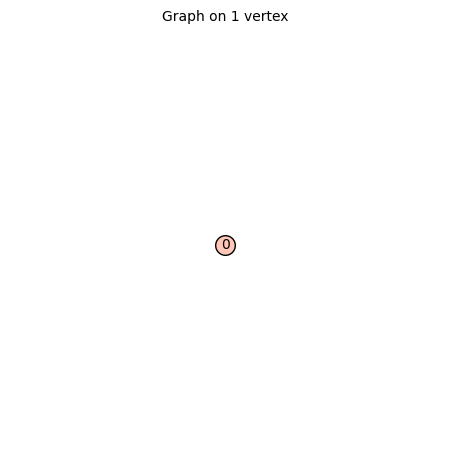

In [75]:
g.add_vertex(0)
g

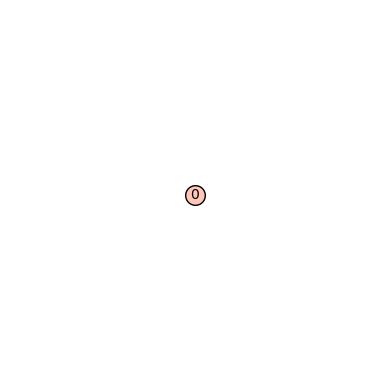

In [76]:
g.show()

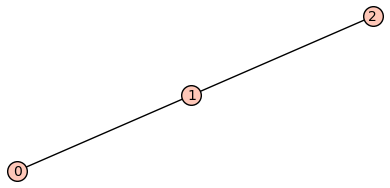

In [77]:
g.add_edge(1,2)
g.add_edge(1,0)
g.show()

In [78]:
g.delete_edge(1,0)

In [79]:
g

Als Bezeichnungen der Knoten können fast beliebige Objekte genommen werden. Wichtig ist nur, dass die Objekte <b>immutable</b>, also unveränderbar sind. 

Matrizen sind z.B. standardmäßig nicht immutable, da ihre Einträge verändert werden können.

In [80]:
a=matrix(2,2,[1,x,2,3])
a

[1 x]
[2 3]

In [81]:
g.add_edge(1,a)

TypeError: mutable matrices are unhashable

Wir machen die Matrix immutable.

In [ ]:
a.set_immutable()

In [ ]:
a[0,0]=2

In [ ]:
g.add_edge(1,a)

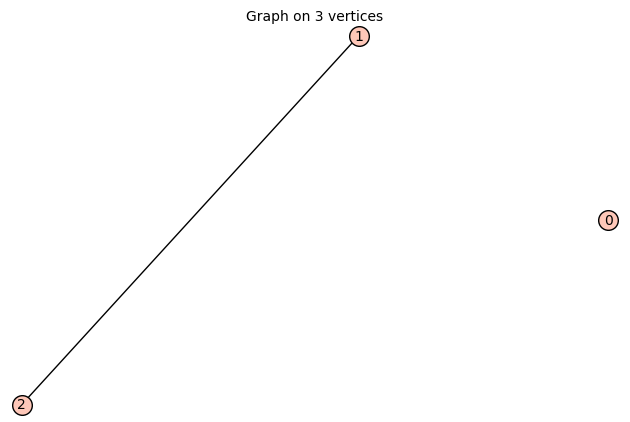

In [82]:
g

Sage hat eine große Bibliothek an vordefinierten Graphen.

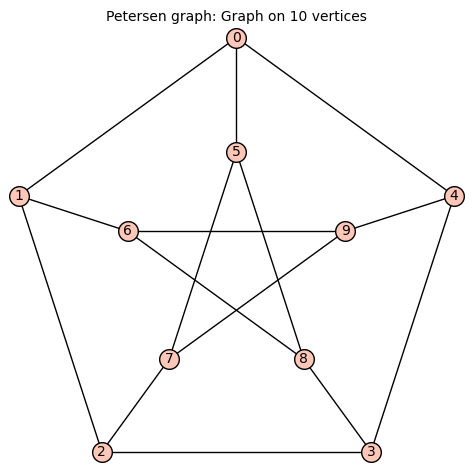

In [83]:
p=graphs.PetersenGraph()
p

Viele Graphentheoretische Algorithmen sind in Sage implementiert. Hier ein paar Beispiele.

Kann der Graph gezeichnet werden, ohne dass sich Kanten überkreuzen?

In [84]:
p.is_planar()

False

In [85]:
p.neighbors(1)

[0, 2, 6]

Wie viele Farben braucht man, um die Knoten so einzufärben, dass benachbarte Knoten verschiedene Farben haben? (vgl. Vierfarbensatz)

In [86]:
p.chromatic_number()

3

Eine konkrete Färbung.

In [87]:
p.coloring()

[[0, 2, 6], [1, 3, 5, 9], [4, 7, 8]]

Wir wollen die Färbung direkt im Bild des Graphen anzeigen.

In [88]:
c=p.coloring(hex_colors=True)
c

{'#ff0000': [0, 2, 6], '#00ff00': [1, 3, 5, 9], '#0000ff': [4, 7, 8]}

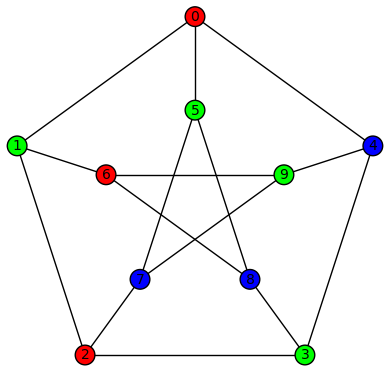

In [89]:
p.show(vertex_colors=c)

Wir wollen nun die Knoten so umbenennen, dass jeweils die inneren mit den äußeren Knoten Plätze tauschen. Dass können wir über eine Permutation der Knoten erreichen.

In [90]:
S10=SymmetricGroup(10)

In [91]:
u=S10([6,7,8,9,10,1,2,3,4,5])
u

(1,6)(2,7)(3,8)(4,9)(5,10)

Umbenennen verändert den Graphen, also arbeiten wir lieber mit einer Kopie

In [92]:
p2=p.copy()

In [93]:
p2.relabel(u)

In [94]:
p2.show()

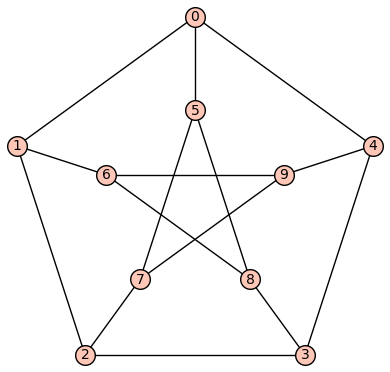

In [95]:
p.show()

Sind zwei Graphen gleich bis auf Umbenennen der Knoten?

In [96]:
p.is_isomorphic(p2)

True

Bäume sind Graphen, die keine Kreise enthalten, also keine Pfade, die im selben Knoten beginnen und enden.

Wir erzeugen hier alle Bäume mit 5 Knoten.

In [97]:
t5=graphs.trees(5)
t5

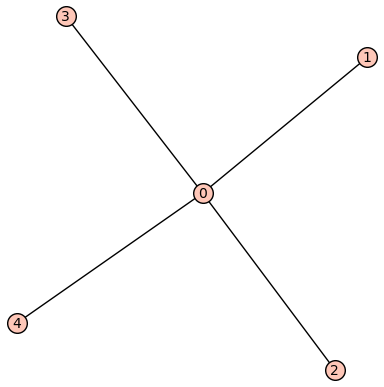

In [98]:
for t in t5:
    t.show()

Der Graph bestehend aus Ecken und Kanten eines Ikosaeders.

In [99]:
g20=graphs.IcosahedralGraph()
g20.show()

Hamiltonscher Kreis: Ein Kreis, der alle Knoten genau einmal enthält.

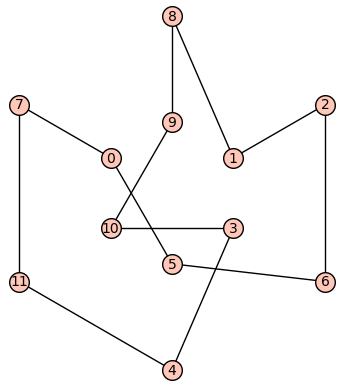

In [100]:
g20.hamiltonian_cycle().show()

Eulertour: ein Kreis, der alle Kanten genau einmal durchläuft. 

In [101]:
g20.eulerian_circuit()

False

Der Ikosaedergraph hat also keine Eulertour. 

Der vollständige Graph mit 5 Knoten. (D.h. alle möglichen Kanten existieren in dem Graphen)

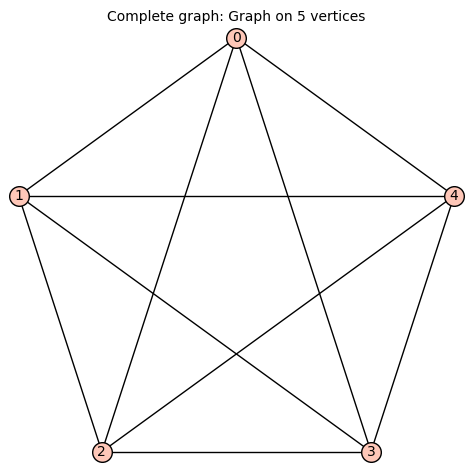

In [102]:
k5=graphs.CompleteGraph(5)
k5

In [103]:
k5.eulerian_circuit()

[(0, 4, None),
 (4, 3, None),
 (3, 2, None),
 (2, 4, None),
 (4, 1, None),
 (1, 3, None),
 (3, 0, None),
 (0, 2, None),
 (2, 1, None),
 (1, 0, None)]

Darstellung der Eulertour im Bild des Graphen

In [104]:
for e,i in zip(k5.eulerian_circuit(),(1..)):
    k5.set_edge_label(e[0],e[1],i)

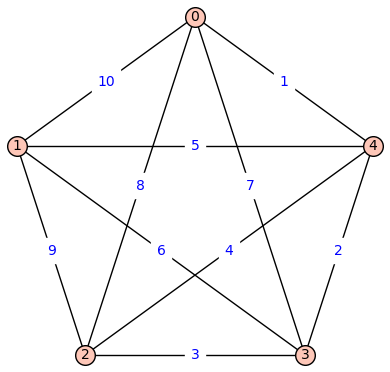

In [105]:
k5.show(edge_labels=True)